# CatBoost and CoreML tutorial — Titanic dataset

CatBoost does support model export to Apple's [CoreML](https://developer.apple.com/machine-learning/) format, which lets you to easily embed ML models into applications on Apple's platforms.

Currently, export of models with only float and one-hot features supported.

This tutorial demonstrates exporting of CatBoost model trained on  [Titanic](https://www.kaggle.com/c/titanic/data) dataset to CoreML model.

Get titanic dataset:

In [2]:
import numpy as np

from catboost import Pool
from catboost.datasets import titanic

In [3]:
train_df = titanic()[0]
X, y = train_df.drop('Survived', axis=1), train_df.Survived

In [4]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let us drop Name and Ticket features as they can't be one-hot features (currently, one_hot_max_size can not be more than 255).

In [5]:
X.drop(['Name', 'Ticket'], axis=1, inplace=True)
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [6]:
is_cat = (X.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]

In [7]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NAN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NAN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NAN,S


In [8]:
train_pool = Pool(data=X, label=y, cat_features=cat_features_index)

Train the model:

In [31]:
model = catboost.CatBoost(params={'loss_function': 'Logloss', 'one_hot_max_size': 255})
model.fit(train_pool)

Learning rate set to 0.016216
0:	learn: 0.6862767	total: 86.1ms	remaining: 1m 26s
1:	learn: 0.6783787	total: 160ms	remaining: 1m 19s
2:	learn: 0.6697912	total: 226ms	remaining: 1m 15s
3:	learn: 0.6613836	total: 315ms	remaining: 1m 18s
4:	learn: 0.6526145	total: 380ms	remaining: 1m 15s
5:	learn: 0.6440689	total: 442ms	remaining: 1m 13s
6:	learn: 0.6372247	total: 525ms	remaining: 1m 14s
7:	learn: 0.6293668	total: 592ms	remaining: 1m 13s
8:	learn: 0.6218637	total: 666ms	remaining: 1m 13s
9:	learn: 0.6144008	total: 751ms	remaining: 1m 14s
10:	learn: 0.6085363	total: 914ms	remaining: 1m 22s
11:	learn: 0.6024630	total: 1.03s	remaining: 1m 24s
12:	learn: 0.5953813	total: 1.2s	remaining: 1m 31s
13:	learn: 0.5886078	total: 1.31s	remaining: 1m 32s
14:	learn: 0.5831134	total: 1.38s	remaining: 1m 30s
15:	learn: 0.5795098	total: 1.45s	remaining: 1m 28s
16:	learn: 0.5735856	total: 1.51s	remaining: 1m 27s
17:	learn: 0.5704893	total: 1.55s	remaining: 1m 24s
18:	learn: 0.5649782	total: 1.62s	remaining:

157:	learn: 0.4091447	total: 17.4s	remaining: 1m 32s
158:	learn: 0.4090961	total: 17.5s	remaining: 1m 32s
159:	learn: 0.4090386	total: 17.5s	remaining: 1m 32s
160:	learn: 0.4090343	total: 17.6s	remaining: 1m 31s
161:	learn: 0.4086938	total: 17.7s	remaining: 1m 31s
162:	learn: 0.4086387	total: 17.8s	remaining: 1m 31s
163:	learn: 0.4082718	total: 17.9s	remaining: 1m 31s
164:	learn: 0.4080320	total: 18s	remaining: 1m 31s
165:	learn: 0.4077367	total: 18.2s	remaining: 1m 31s
166:	learn: 0.4076536	total: 18.3s	remaining: 1m 31s
167:	learn: 0.4076090	total: 18.4s	remaining: 1m 31s
168:	learn: 0.4074269	total: 18.5s	remaining: 1m 30s
169:	learn: 0.4073756	total: 18.6s	remaining: 1m 30s
170:	learn: 0.4073461	total: 18.7s	remaining: 1m 30s
171:	learn: 0.4073256	total: 18.8s	remaining: 1m 30s
172:	learn: 0.4072923	total: 18.8s	remaining: 1m 30s
173:	learn: 0.4072897	total: 18.9s	remaining: 1m 29s
174:	learn: 0.4071053	total: 19s	remaining: 1m 29s
175:	learn: 0.4070145	total: 19.1s	remaining: 1m 2

313:	learn: 0.3908919	total: 30.1s	remaining: 1m 5s
314:	learn: 0.3908674	total: 30.1s	remaining: 1m 5s
315:	learn: 0.3907107	total: 30.2s	remaining: 1m 5s
316:	learn: 0.3906617	total: 30.2s	remaining: 1m 5s
317:	learn: 0.3906231	total: 30.3s	remaining: 1m 4s
318:	learn: 0.3905995	total: 30.3s	remaining: 1m 4s
319:	learn: 0.3904420	total: 30.4s	remaining: 1m 4s
320:	learn: 0.3903957	total: 30.5s	remaining: 1m 4s
321:	learn: 0.3903426	total: 30.5s	remaining: 1m 4s
322:	learn: 0.3903307	total: 30.6s	remaining: 1m 4s
323:	learn: 0.3902220	total: 30.7s	remaining: 1m 4s
324:	learn: 0.3900585	total: 30.8s	remaining: 1m 4s
325:	learn: 0.3900549	total: 30.9s	remaining: 1m 3s
326:	learn: 0.3900182	total: 31s	remaining: 1m 3s
327:	learn: 0.3899942	total: 31.1s	remaining: 1m 3s
328:	learn: 0.3899563	total: 31.2s	remaining: 1m 3s
329:	learn: 0.3899341	total: 31.3s	remaining: 1m 3s
330:	learn: 0.3898982	total: 31.3s	remaining: 1m 3s
331:	learn: 0.3898756	total: 31.4s	remaining: 1m 3s
332:	learn: 0.

473:	learn: 0.3780742	total: 43.9s	remaining: 48.8s
474:	learn: 0.3779526	total: 44.1s	remaining: 48.7s
475:	learn: 0.3778810	total: 44.2s	remaining: 48.6s
476:	learn: 0.3778705	total: 44.2s	remaining: 48.5s
477:	learn: 0.3774091	total: 44.4s	remaining: 48.4s
478:	learn: 0.3773533	total: 44.5s	remaining: 48.4s
479:	learn: 0.3773364	total: 44.6s	remaining: 48.3s
480:	learn: 0.3772633	total: 44.7s	remaining: 48.2s
481:	learn: 0.3771817	total: 44.8s	remaining: 48.1s
482:	learn: 0.3771602	total: 44.9s	remaining: 48s
483:	learn: 0.3767799	total: 45s	remaining: 48s
484:	learn: 0.3766612	total: 45.1s	remaining: 47.9s
485:	learn: 0.3766311	total: 45.2s	remaining: 47.8s
486:	learn: 0.3765705	total: 45.3s	remaining: 47.7s
487:	learn: 0.3764972	total: 45.4s	remaining: 47.6s
488:	learn: 0.3764306	total: 45.5s	remaining: 47.6s
489:	learn: 0.3763462	total: 45.6s	remaining: 47.5s
490:	learn: 0.3762623	total: 45.7s	remaining: 47.4s
491:	learn: 0.3760703	total: 45.8s	remaining: 47.3s
492:	learn: 0.3760

634:	learn: 0.3577991	total: 1m 4s	remaining: 37.2s
635:	learn: 0.3575724	total: 1m 4s	remaining: 37.1s
636:	learn: 0.3570947	total: 1m 4s	remaining: 37s
637:	learn: 0.3569391	total: 1m 5s	remaining: 36.9s
638:	learn: 0.3567285	total: 1m 5s	remaining: 36.8s
639:	learn: 0.3566697	total: 1m 5s	remaining: 36.7s
640:	learn: 0.3566300	total: 1m 5s	remaining: 36.6s
641:	learn: 0.3565517	total: 1m 5s	remaining: 36.5s
642:	learn: 0.3562532	total: 1m 5s	remaining: 36.4s
643:	learn: 0.3561762	total: 1m 5s	remaining: 36.3s
644:	learn: 0.3560884	total: 1m 5s	remaining: 36.2s
645:	learn: 0.3560177	total: 1m 5s	remaining: 36.1s
646:	learn: 0.3559647	total: 1m 6s	remaining: 36s
647:	learn: 0.3557343	total: 1m 6s	remaining: 35.9s
648:	learn: 0.3554319	total: 1m 6s	remaining: 35.8s
649:	learn: 0.3550865	total: 1m 6s	remaining: 35.7s
650:	learn: 0.3545669	total: 1m 6s	remaining: 35.7s
651:	learn: 0.3545296	total: 1m 6s	remaining: 35.6s
652:	learn: 0.3544199	total: 1m 6s	remaining: 35.5s
653:	learn: 0.35

792:	learn: 0.3392420	total: 1m 23s	remaining: 21.7s
793:	learn: 0.3391923	total: 1m 23s	remaining: 21.6s
794:	learn: 0.3391577	total: 1m 23s	remaining: 21.5s
795:	learn: 0.3390941	total: 1m 23s	remaining: 21.4s
796:	learn: 0.3388046	total: 1m 23s	remaining: 21.3s
797:	learn: 0.3386977	total: 1m 23s	remaining: 21.2s
798:	learn: 0.3386513	total: 1m 23s	remaining: 21.1s
799:	learn: 0.3385754	total: 1m 23s	remaining: 21s
800:	learn: 0.3383295	total: 1m 24s	remaining: 20.9s
801:	learn: 0.3382929	total: 1m 24s	remaining: 20.8s
802:	learn: 0.3382446	total: 1m 24s	remaining: 20.7s
803:	learn: 0.3378838	total: 1m 24s	remaining: 20.6s
804:	learn: 0.3378467	total: 1m 24s	remaining: 20.5s
805:	learn: 0.3377894	total: 1m 24s	remaining: 20.4s
806:	learn: 0.3377467	total: 1m 24s	remaining: 20.3s
807:	learn: 0.3376984	total: 1m 24s	remaining: 20.2s
808:	learn: 0.3376020	total: 1m 24s	remaining: 20s
809:	learn: 0.3375570	total: 1m 25s	remaining: 19.9s
810:	learn: 0.3374794	total: 1m 25s	remaining: 19.

949:	learn: 0.3243650	total: 1m 37s	remaining: 5.12s
950:	learn: 0.3241990	total: 1m 37s	remaining: 5.02s
951:	learn: 0.3240369	total: 1m 37s	remaining: 4.91s
952:	learn: 0.3239451	total: 1m 37s	remaining: 4.81s
953:	learn: 0.3238296	total: 1m 37s	remaining: 4.71s
954:	learn: 0.3231618	total: 1m 37s	remaining: 4.6s
955:	learn: 0.3230309	total: 1m 37s	remaining: 4.5s
956:	learn: 0.3230170	total: 1m 37s	remaining: 4.39s
957:	learn: 0.3229821	total: 1m 37s	remaining: 4.29s
958:	learn: 0.3229721	total: 1m 37s	remaining: 4.19s
959:	learn: 0.3229127	total: 1m 37s	remaining: 4.08s
960:	learn: 0.3228006	total: 1m 38s	remaining: 3.98s
961:	learn: 0.3227652	total: 1m 38s	remaining: 3.88s
962:	learn: 0.3226453	total: 1m 38s	remaining: 3.77s
963:	learn: 0.3224972	total: 1m 38s	remaining: 3.67s
964:	learn: 0.3224627	total: 1m 38s	remaining: 3.57s
965:	learn: 0.3222590	total: 1m 38s	remaining: 3.46s
966:	learn: 0.3221303	total: 1m 38s	remaining: 3.36s
967:	learn: 0.3218296	total: 1m 38s	remaining: 3

Predict probabilities:

In [32]:
test_pool = Pool(data=X[0:1], cat_features=cat_features_index)

In [33]:
model.predict(test_pool, prediction_type="Probability")

array([[0.88839389, 0.11160611]])

Save model:

In [ ]:
model.save_model(
    "titanic.mlmodel",
    format="coreml",
    export_parameters={
        'prediction_type': 'probability'
    }
)

Features that are not used for building trees are missing for CoreML model. 

All the features are named as "feature_i" where i is a feature number in the dataset starting from 0.

In [37]:
model.feature_importances_

array([ 0.        , 16.27123069, 37.55636623, 13.92626468,  4.33998925,
        3.62923946, 15.95130018,  5.63702567,  2.68858384])

As we can see, feature PassengerId has zero importance, so feature_0 is missing for CoreML model.

Now you can import saved model to XCode and use it directly from swift:

```swift
import CoreML

let model = titanic()

let pclass = "1"
let sex = "female"
let age = 38.0
let sibsp = "1"
let parch = "0"
let fare = 71.2833
let cabin = "C85"
let embarked = "C"

guard let titanicOutput = try? model.prediction(feature_3: age, feature_6: fare, feature_1: pclass, feature_2: sex, feature_4: sibsp, feature_5: parch, feature_7: cabin, feature_8: embarked) else {
            fatalError("Unexpected runtime error.")
        }

print(String(
    format: "Probability of survival: %1.5f",
    titanicOutput.prediction[0].doubleValue
))
```

If you want to practice, titanic model is easy to integrate into Apple's  [MarsHabitatPricer](https://developer.apple.com/documentation/coreml/integrating_a_core_ml_model_into_your_app) example project:

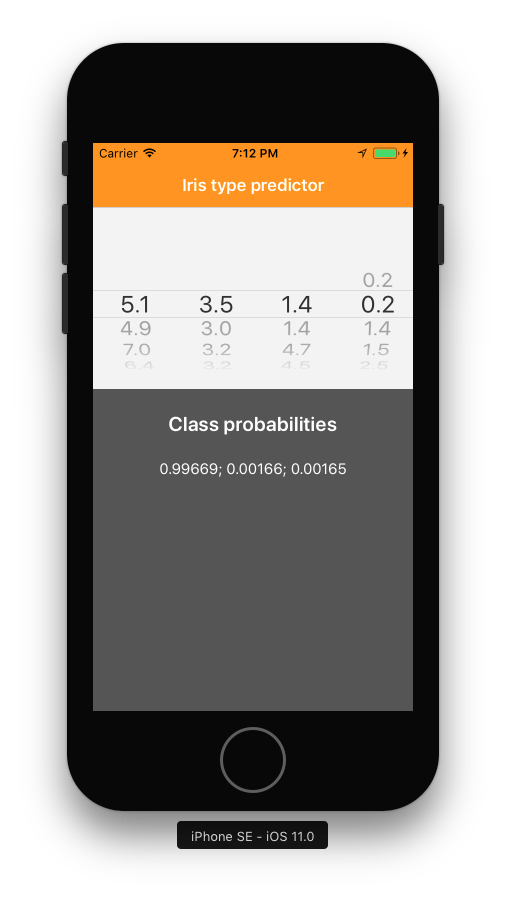